<a href="https://colab.research.google.com/github/brenddonandrade/Dados-Relatorio-Final/blob/main/Communicability_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Necessary Installations and Imports

In [215]:
!pip install -q numpy==1.23.5
!pip install -q networkx==3.1
!pip install -q matplotlib==3.7.1
!pip install -q pandas==1.5.3
!pip install -q plotly==5.12.0

In [216]:
import networkx as nx
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import csv
import time

# Proposed Method

In [217]:
def communicability(matrix, n):
  matrix_1 = matrix.copy()
  matrix_2 = matrix.copy()
  matrix_3 = matrix.copy()
  matrix_c = np.identity(len(matrix), float)
  matrix_c = matrix_c + matrix_1

  for k in range(2,n+1):

    # Raise the matrix by k
    matrix_1 = np.matmul(matrix_1, matrix_2)
    matrix_3 = matrix_1/factorial(k)


    # Sum the n matrices
    matrix_c = matrix_c + matrix_3

  return matrix_c

# Dependency

## Transform Dict from NetworkX to Numpy Array

In [218]:
def nx_to_np(dict_comunica):
    nodes = dict_comunica.__len__()
    matrix_c = np.zeros((nodes, nodes), float)

    for node_i, nodedict in dict_comunica.items():
        for node_j, value in nodedict.items():
            matrix_c[node_i][node_j] = value

    return matrix_c

## Create matrix adjacency

In [219]:
def create_matrix_adj(G):

  nodes = len(G.adj.items())
  matrix_adj = np.zeros((nodes, nodes), int)

  for node, nodedict in G.adj.items():
    for key in nodedict.keys():
      matrix_adj[node][key] = 1
      matrix_adj[key][node] = 1

  return matrix_adj


## Comparation

In [220]:
def compare_values(value_1, value_2):
    comparation = (value_1/value_2)*100
    return comparation

## The cost of the time


In [221]:
def method_1_cost(G):
    # Spectral
    time_start = time.time()
    for i in range(number_of_measures):
        nx.communicability(G)
    time_end = time.time()

    mean_time = (time_end - time_start)/number_of_measures
    cost = mean_time
    return cost


def method_2_cost(G):
    # Exponential
    time_start = time.time()
    for i in range(number_of_measures):
        nx.communicability_exp(G)
    time_end = time.time()

    cost = mean_time = (time_end - time_start)/number_of_measures


    return cost


def method_3_cost(G, n):
    # Method in serie
    time_start = time.time()
    matrix_adj = create_matrix_adj(G)
    for i in range(number_of_measures):
        matrix_c = communicability(matrix_adj, n)
    time_end = time.time()

    mean_time = (time_end - time_start)/number_of_measures

    cost = mean_time
    return cost

## Methods Relation

In [222]:
def methods_ratio_1(G):
    # Method in serie ratio
    list_ratio = []
    com_1 = nx_to_np(nx.communicability(G))
    mean_1 = com_1.mean()


    matrix_adj = create_matrix_adj(G)
    for i in range(1, K_graphic+1):
        matrix_c = communicability(matrix_adj, i)
        mean = matrix_c.mean()
        list_ratio.append(compare_values(mean, mean_1))


    return list_ratio


def methods_ratio_2(G):
    list_ratio = []
    com_2 = nx_to_np(nx.communicability_exp(G))
    mean_2 = com_2.mean()


    matrix_adj = create_matrix_adj(G)
    for i in range(1, K_graphic+1):
        matrix_c = communicability(matrix_adj, i)
        mean = matrix_c.mean()
        list_ratio.append(compare_values(mean, mean_2))

    return list_ratio


## Creating the data

In [223]:
def time_cost_special(nodes, edges):
    data_cost = {}
    list_data_time_1 = []
    list_data_time_2 = []
    list_data_time_3 = []

    list_ratio_1 = []
    list_ratio_2 = []

    list_of_terms = []

    # for the random graph with the same number of nodes and edges as zachary's karate club graph.
    G = nx.gnm_random_graph(nodes,edges)

    # Draw the graph
    nx.draw_kamada_kawai(G, with_labels = True)

    time_1 = method_1_cost(G)
    time_2 = method_2_cost(G)

    for i in range(1, K_graphic +1):
        time_3 = method_3_cost(G, i)

        list_data_time_1.append(time_1)
        list_data_time_2.append(time_2)
        list_data_time_3.append(time_3)
        list_of_terms.append(i)


    list_ratio_1 = methods_ratio_1(G)
    list_ratio_2 = methods_ratio_2(G)

    data_cost['Spectral'] = list_data_time_1
    data_cost['Exponential'] = list_data_time_2
    data_cost['Series'] = list_data_time_3
    data_cost['Terms'] = list_of_terms
    data_cost['Series-Spectral'] = list_ratio_1
    data_cost['Series-Exponential'] = list_ratio_2


    df = pd.DataFrame(data_cost)

    return df

## Example

## Constants


In [224]:
# Used constants and graphs

# Methods used
# Method 1: Spectral (nx.communicability(G))
# Method 2: Exponential (nx.communicability_exp(G))
# Method 3: Proposed method

# K for the relation
K_graphic = 20

# Equivalence
EQUIVALENCE = 95

# Mean to calculate time
number_of_measures = 20


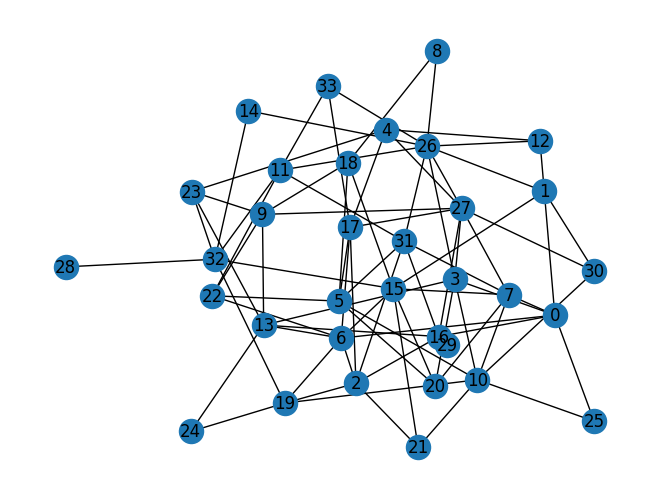

In [225]:
nodes, edges = 34, 78

df = time_cost_special(nodes, edges)

# Saving the data
df.to_csv('df_special_case.csv')

## Work with data


In [226]:
def work_with_data(df, name_index):
    df_result = df.drop('Unnamed: 0', axis=1)
    df_result.set_index(name_index, inplace=True)
    return df_result

In [227]:
df_special_case = pd.read_csv('df_special_case.csv')

In [228]:
df_special_case = work_with_data(df_special_case, 'Terms')

In [229]:
print(df_special_case)

       Spectral  Exponential    Series  Series-Spectral  Series-Exponential
Terms                                                                      
1      0.150167     0.001631  0.000037         2.873691            2.873691
2      0.150167     0.001631  0.000127         9.362184            9.362184
3      0.150167     0.001631  0.000217        20.942657           20.942657
4      0.150167     0.001631  0.000359        36.768126           36.768126
5      0.150167     0.001631  0.000435        53.924820           53.924820
6      0.150167     0.001631  0.000502        69.529637           69.529637
7      0.150167     0.001631  0.000588        81.650421           81.650421
8      0.150167     0.001631  0.000698        89.911403           89.911403
9      0.150167     0.001631  0.000723        94.907258           94.907258
10     0.150167     0.001631  0.000844        97.629978           97.629978
11     0.150167     0.001631  0.000960        98.977734           98.977734
12     0.150

## Plot data

In [230]:
def plot_data_time(df, name_x_axis, name_y_axis, title = None, scale = None, title_legend = None, marker_k = False, marker_value = 95):

    trace_1 = go.Scatter(x=df.index, y=df['Spectral'], mode='markers', name='Espectral')
    trace_2 = go.Scatter(x=df.index, y=df['Exponential'], mode='markers', name='Exponencial')
    trace_3 = go.Scatter(x=df.index, y=df['Series'], mode='markers', name='Série')

    fig = go.Figure(data=[trace_1, trace_2, trace_3])

    fig.update_layout(
        title = {
            'text':  title,
            'font': {
                'size': 32,
                'family': 'Arial',
            },
            'x': 0.5
        },

        legend = {
            'title': {
                'text': title_legend,
                'font': {
                    'size': 24,
                    'family': 'Arial',
                },
            },
            'font': {
                'size': 20,
                'family': 'Arial',
            },
        },


        xaxis_title_text= name_x_axis,
        yaxis_title_text= name_y_axis,

        width = 800,
        height= 600,

        grid = {

        }

    )

    # Marker k*
    if marker_k == True:
        k = 0
        # for value in df['Series-Exponential']:
        for value in df['Série/Exponencial']:
            k = k +1
            if value > marker_value:
                pos_x = k
                pos_y = value
                print(pos_x, pos_y)
                break

        fig.add_trace(
            go.Scatter(
                name = 'k*',
                x= [pos_x],
                y= [pos_y],
                mode='markers',
                marker=dict(size=22,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                showlegend=False,
            )
        )

        fig.update_traces(marker=dict(size=8))
        fig.add_annotation(
            x = pos_x,
            y = pos_y,
            text = f'k*: {pos_x}',
            font = {
                'size': 24,
                'family': 'Arial',
            },

            showarrow=True,
            arrowhead=1,
        )

    # Retired the grid
    fig.update_xaxes (
        showgrid=True,
        title_font = dict(
            size= 24,
            family= 'Arial'),
        tickfont=dict(
            size=20),
        ticks = 'inside',
        nticks = 20
        )
    fig.update_yaxes (
        showgrid=True,
        title_font = dict(
            size= 24,
            family= 'Arial'),
        type = scale,
        tickfont=dict(
            size=20),
        ticks = 'inside'
        )

    fig.update_layout(showlegend=True)
    fig.show()

In [231]:
def plot_data_ratio(df, name_x_axis, name_y_axis, title = None, scale = None, title_legend = None, marker_k = False, marker_value = 95):

    trace_1 = go.Scatter(x=df.index, y=df['Series-Spectral'], mode='markers', name='Série/Espectral')
    trace_2 = go.Scatter(x=df.index, y=df['Series-Exponential'], mode='markers', name='Série/Exponencial')

    fig = go.Figure(data=[trace_1, trace_2])

    fig.update_layout(
        title = {
            'text':  title,
            'font': {
                'size': 32,
                'family': 'Arial',
            },
            'x': 0.5
        },

        legend = {
            'title': {
                'text': title_legend,
                'font': {
                    'size': 24,
                    'family': 'Arial',
                },
            },
            'font': {
                'size': 20,
                'family': 'Arial',
            },
        },


        xaxis_title_text= name_x_axis,
        yaxis_title_text= name_y_axis,

        width = 800,
        height= 600,

        grid = {

        }

    )

    # Marker k*
    if marker_k == True:
        k = 0
        for value in df['Series-Spectral']:
            k = k +1
            if value > marker_value:
                pos_x = k
                pos_y = value
                print(pos_x, pos_y)
                break

        fig.add_trace(
            go.Scatter(
                name = 'k*',
                x= [pos_x],
                y= [pos_y],
                mode='markers',
                marker=dict(size=22,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                showlegend=False,
            )
        )

        fig.update_traces(marker=dict(size=8))
        fig.add_annotation(
            x = pos_x,
            y = pos_y,
            text = f'k*: {pos_x}',
            font = {
                'size': 24,
                'family': 'Arial',
            },

            showarrow=True,
            arrowhead=1,
        )

    # Retired the grid
    fig.update_xaxes (
        showgrid=True,
        title_font = dict(
            size= 24,
            family= 'Arial'),
        tickfont=dict(
            size=20),
        ticks = 'inside',
        nticks = 20
        )
    fig.update_yaxes (
        showgrid=True,
        title_font = dict(
            size= 24,
            family= 'Arial'),
        type = scale,
        tickfont=dict(
            size=20),
        ticks = 'inside'
        )

    fig.update_layout(showlegend=True)
    fig.show()

## Special case

In [232]:
plot_data_time(df_special_case,'Termos [k]', 'log[Tempo [s]]', scale=  'log')

In [233]:
plot_data_ratio(df_special_case,  'Termos [k]', 'Razão [%]', marker_k = True)

10 97.6299776466328


## How much is fastest?

In [234]:
def fastest(df):
    line = 1

    for value in df['Series-Spectral']:
        if(value >= 95):
            break

        line = line + 1

    # Series by Spectral
    ratio_1 = df['Spectral'][line]/ df['Series'][line]

    # Series by Exponential
    ratio_2 = df['Exponential'][line]/ df['Series'][line]

    print(f'Séries é {ratio_1:.2f} vezes mais rápido que o Espectral.')
    print(f'Séries é {ratio_2:.2f} vezes mais rápido que o Exponencial')

In [235]:
fastest(df_special_case)

Séries é 178.00 vezes mais rápido que o Espectral.
Séries é 1.93 vezes mais rápido que o Exponencial
